# Hierarchical Clustering

## Definition
Forms a tree-type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two categories:
    1. Agglomerative (bottom up approach) - Start with many small clusters and merge them to create bigger ones
    2. Divisive (top down approach) - Start with a single cluster than break it up into smaller ones
![Hierarchial Cluster Image](hierarchical clustering.png)

## Pros & Cons
### Pros
* No assumption of a particular number of clusters (like k-means)
* May correspond to meaningful taxonomies
### Cons
* Once a decision is made to merge two clusters, it can't e undone
* Too slow for large data sets, both Time (O(n2log(2))) & Space Complexity

## Algorithm
### Agglomerative
1. Make each data point a cluster
2. Take the two closest cluster and merge then into one cluster
3. Repeat step 2 until there is only one cluster

## Visulization
### Dendrograms
* Dendograms are used to represent the distances at which the the different clusters meet.
* They provide us an idea as to how the clustering looks like  diagrammatically 

We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
1. Determine the largest vertical distance that doesn’t intersect any of the other clusters
2. Draw a horizontal line at both extremities
3. The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

For e.g., the following diagram repsents 4 clusters as the best choice.
![Dendrogram Image](Dendrogram.png)

*Note: Based on the method chosen to calculate distance between the clusters, the same dataset may result in different dendograms*

## Linkage Criteria
There are certain params in hierarchical clustering which can be tuned to get different results for clustering similar to tuning supervised learning models. Linkage Criteria is one such parameter. The linkage criteria refers to how the distance between clusters is calculated.
1. Single Linkage - The distance between two clusters is the shortest distance between two points in each cluster
![SingleLinkage Image](SingleLinkage.png)
2. Complete Linkage - The distance between two clusters is the longest distance between two points in each cluster
![CompleteLinkage Image](CompleteLinkage.png)
3. Average Linkage - The distance between clusters is the average distance between each point in one cluster to every point in other cluster
![AverageLinkage Image](AverageLinkage.png)
4. Ward Linkage - The distance between clusters is the sum of squared differences within all clusters
![WardLinkage Image](WardLinkage.png)

*Note: Distance between two or more clusters can be calculated using multiple approaches, the most popular being Euclidean Distance. However, other distance metrics like Minkowski, City Block, Hamming, Jaccard, Chebyshev, etc. can also be used with hierarchical clustering.*

The following diagram illustrate the impact of linkage to the clustering:
![Linkage Influence on Clustering Demonstration](LinkageDemo.gif)

Visually looking into every dendrogram to determine which clustering linkage works best is challenging and requires a lot of manual effort. To overcome this the concept of Cophenetic Coefficient is introduced.

* Cophenet index is a measure of the correlation between the distance of points in feature space and distance on the dendrogram.
* Dendogram Distance - distance between two points/clusters as described by that dendogram.

If the distance between these points increases with the dendrogram distance between the clusters then the Cophenet index is closer to 1. There are no statistical techniques to decide the number of clusters in hierarchical clustering, unlike a K Means algorithm that uses an elbow plot to determine the number of clusters. However, one common approach is to analyze the dendrogram and look for groups that combine at a higher dendrogram distance. This can also be verified using a silhouette index score.

## DataSet

The dataset for this introduction notebook is obtained from [https://www.kaggle.com/ankushkumar0511/mall-customers](https://www.kaggle.com/ankushkumar0511/mall-customers)

This is a simple dataset that has data of customers shopping in a mall. Following are the features:
CustomerID
Gender
Age
Annual Income
Spending Score

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Read DataSet
customer_db = pd.read_csv("Mall_Customers.csv", names=['ID','Gender','Age','AnnualIncome','SpendingScore'], header=0)

In [15]:
# Print first few rows
customer_db.head()

,ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Check whether we have null entries
customer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


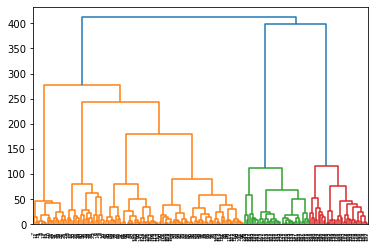

In [17]:
# Use Hierarchical Clustering and Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(customer_db[['Age','AnnualIncome','SpendingScore']], method = 'ward'))

In [21]:
# Training Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [22]:
labels = cluster.fit_predict(customer_db[['Age','AnnualIncome','SpendingScore']])

In [29]:
cluster1 = customer_db[labels == 0]
cluster2 = customer_db[labels == 1]
cluster3 = customer_db[labels == 2]
cluster4 = customer_db[labels == 3]
cluster5 = customer_db[labels == 4]

In [30]:
cluster1.head()

,ID,Gender,Age,AnnualIncome,SpendingScore
27,28,Male,35,28,61
43,44,Female,31,39,61
45,46,Female,24,39,65
46,47,Female,50,40,55
47,48,Female,27,40,47


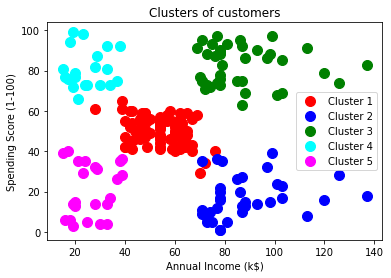

In [31]:
# Visualising the clusters
plt.scatter(cluster1['AnnualIncome'], cluster1['SpendingScore'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster2['AnnualIncome'], cluster2['SpendingScore'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster3['AnnualIncome'], cluster3['SpendingScore'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(cluster4['AnnualIncome'], cluster4['SpendingScore'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(cluster5['AnnualIncome'], cluster5['SpendingScore'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Try with different linkages

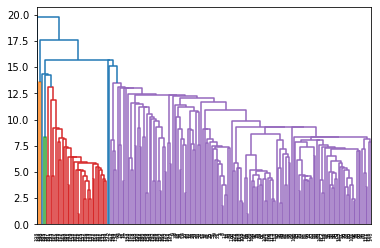

In [43]:

dendrogram = sch.dendrogram(sch.linkage(customer_db[['Age','AnnualIncome','SpendingScore']], method = 'single'))

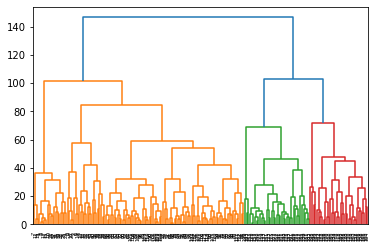

In [41]:
dendrogram = sch.dendrogram(sch.linkage(customer_db[['Age','AnnualIncome','SpendingScore']], method = 'complete'))

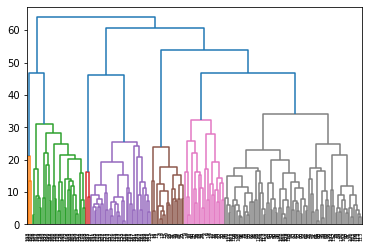

In [42]:
dendrogram = sch.dendrogram(sch.linkage(customer_db[['Age','AnnualIncome','SpendingScore']], method = 'average'))

In [46]:

cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
labels = cluster.fit_predict(customer_db[['Age','AnnualIncome','SpendingScore']])
cluster1 = customer_db[labels == 0]
cluster2 = customer_db[labels == 1]
cluster3 = customer_db[labels == 2]
cluster4 = customer_db[labels == 3]
print(cluster1.size, cluster2.size, cluster3.size, cluster4.size)

530 175 195 100


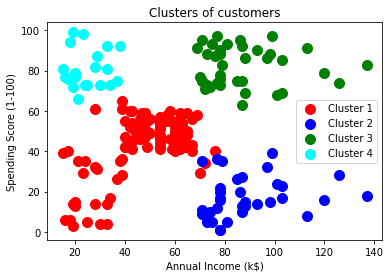

In [47]:
plt.scatter(cluster1['AnnualIncome'], cluster1['SpendingScore'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster2['AnnualIncome'], cluster2['SpendingScore'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster3['AnnualIncome'], cluster3['SpendingScore'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(cluster4['AnnualIncome'], cluster4['SpendingScore'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

*Note: Deciding the number of clusters in any clustering exercise is a tedious task. Since the commercial side of the business is more focused on getting some meaning out of these groups, it is important to visualize the clusters in a two-dimensional space and check if they are distinct from each other. This can be achieved via PCA or Factor Analysis. This is a widely used mechanism to present the final results to different stakeholders that makes it easier for everyone to consume the output.*

# References
1. [https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab](https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab)
2. [https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)
3. [https://www.kaggle.com/rishidamarla/hierarchical-clustering-machine-learning-tutorial](https://www.kaggle.com/rishidamarla/hierarchical-clustering-machine-learning-tutorial)